# Importing Libraries and Loading Dataset

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
#Reading Dataset
data = pd.read_csv("CovidData.csv")

In [ ]:
#Displaying Dataset
data

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,...,2,2,2,2,2,2,2,2,3,97


# Data Processing

In [ ]:
#Dropping Unnecessary Columns from Dataset
data = data.drop(["id", "entry_date", "date_symptoms", "date_died", "intubed", "covid_res", "patient_type", "contact_other_covid"], axis = 1)

In [ ]:
#Displaying Dataset
data

,sex,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
0,2,2,27,97,2,2,2,2,2,2,2,2,2,2,97
1,2,2,24,97,2,2,2,2,2,2,2,2,2,2,97
2,1,2,54,2,2,2,2,2,2,2,2,1,2,2,2
3,2,1,30,97,2,2,2,2,2,2,2,2,2,2,2
4,1,2,60,2,1,2,2,2,1,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,2,58,97,1,2,2,2,2,2,2,2,2,2,97
566598,1,2,48,2,2,2,2,2,2,2,2,2,2,2,97
566599,1,1,49,2,2,2,2,2,2,2,2,1,2,2,2
566600,1,1,43,2,2,2,2,2,2,2,2,2,2,2,97


In [ ]:
#Filtering Non-Applicable Data and Removing them Column by Column
data.loc[data['icu'] == 97, 'icu'] = 0
data.loc[data['pregnancy'] == 97, 'pregnancy'] = 1
data = data[data["age"] != 0]
data = data[data["pneumonia"] != 99]
data = data[data["pregnancy"] != 98]
data = data[data["diabetes"] != 98]
data = data[data["copd"] != 98]
data = data[data["asthma"] != 98]
data = data[data["inmsupr"] != 98]
data = data[data["hypertension"] != 98]
data = data[data["other_disease"] != 98]
data = data[data["cardiovascular"] != 98]
data = data[data["obesity"] != 98]
data = data[data["renal_chronic"] != 98]
data = data[data["tobacco"] != 98]
data = data[data["icu"] != 99]

In [ ]:
#Displaying Dataset
data

,sex,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
0,2,2,27,1,2,2,2,2,2,2,2,2,2,2,0
1,2,2,24,1,2,2,2,2,2,2,2,2,2,2,0
2,1,2,54,2,2,2,2,2,2,2,2,1,2,2,2
3,2,1,30,1,2,2,2,2,2,2,2,2,2,2,2
4,1,2,60,2,1,2,2,2,1,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,2,58,1,1,2,2,2,2,2,2,2,2,2,0
566598,1,2,48,2,2,2,2,2,2,2,2,2,2,2,0
566599,1,1,49,2,2,2,2,2,2,2,2,1,2,2,2
566600,1,1,43,2,2,2,2,2,2,2,2,2,2,2,0


In [ ]:
#Replacing Numerical Values with Strings so that we can understand the dataset better
data['icu'] = data['icu'].replace([0], 'low')
data['pneumonia'] = data['pneumonia'].replace([1], 'yes')
data['pregnancy'] = data['pregnancy'].replace([1], 'yes')
data['diabetes'] = data['diabetes'].replace([1], 'yes')
data['copd'] = data['copd'].replace([1], 'yes')
data['asthma'] = data['asthma'].replace([1], 'yes')
data['inmsupr'] = data['inmsupr'].replace([1], 'yes')
data['hypertension'] = data['hypertension'].replace([1], 'yes')
data['other_disease'] = data['other_disease'].replace([1], 'yes')
data['cardiovascular'] = data['cardiovascular'].replace([1], 'yes')
data['obesity'] = data['obesity'].replace([1], 'yes')
data['renal_chronic'] = data['renal_chronic'].replace([1], 'yes')
data['tobacco'] = data['tobacco'].replace([1], 'yes')
data['sex'] = data['sex'].replace([1], 'male')
data['icu'] = data['icu'].replace([1], 'high')
data['pneumonia'] = data['pneumonia'].replace([2], 'no')
data['pregnancy'] = data['pregnancy'].replace([2], 'no')
data['diabetes'] = data['diabetes'].replace([2], 'no')
data['copd'] = data['copd'].replace([2], 'no')
data['asthma'] = data['asthma'].replace([2], 'no')
data['inmsupr'] = data['inmsupr'].replace([2], 'no')
data['hypertension'] = data['hypertension'].replace([2], 'no')
data['other_disease'] = data['other_disease'].replace([2], 'no')
data['cardiovascular'] = data['cardiovascular'].replace([2], 'no')
data['obesity'] = data['obesity'].replace([2], 'no')
data['renal_chronic'] = data['renal_chronic'].replace([2], 'no')
data['tobacco'] = data['tobacco'].replace([2], 'no')
data['sex'] = data['sex'].replace([2], 'female')
data['icu'] = data['icu'].replace([2], 'medium')

In [ ]:
#Displaying Dataset
data

,sex,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
0,female,no,27,yes,no,no,no,no,no,no,no,no,no,no,low
1,female,no,24,yes,no,no,no,no,no,no,no,no,no,no,low
2,male,no,54,no,no,no,no,no,no,no,no,yes,no,no,medium
3,female,yes,30,yes,no,no,no,no,no,no,no,no,no,no,medium
4,male,no,60,no,yes,no,no,no,yes,no,yes,no,no,no,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,female,no,58,yes,yes,no,no,no,no,no,no,no,no,no,low
566598,male,no,48,no,no,no,no,no,no,no,no,no,no,no,low
566599,male,yes,49,no,no,no,no,no,no,no,no,yes,no,no,medium
566600,male,yes,43,no,no,no,no,no,no,no,no,no,no,no,low


In [ ]:
#Changing Order of Columns from the most important to least ones
data = data[["age", "sex", "tobacco", "pregnancy", "pneumonia", "asthma", "diabetes", "obesity", "hypertension", "cardiovascular", "copd", "renal_chronic", "inmsupr", 
            "other_disease", "icu"]]

In [ ]:
#Displaying Dataset
data

,age,sex,tobacco,pregnancy,pneumonia,asthma,diabetes,obesity,hypertension,cardiovascular,copd,renal_chronic,inmsupr,other_disease,icu
0,27,female,no,yes,no,no,no,no,no,no,no,no,no,no,low
1,24,female,no,yes,no,no,no,no,no,no,no,no,no,no,low
2,54,male,no,no,no,no,no,yes,no,no,no,no,no,no,medium
3,30,female,no,yes,yes,no,no,no,no,no,no,no,no,no,medium
4,60,male,no,no,no,no,yes,no,yes,yes,no,no,no,no,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,58,female,no,yes,no,no,yes,no,no,no,no,no,no,no,low
566598,48,male,no,no,no,no,no,no,no,no,no,no,no,no,low
566599,49,male,no,no,yes,no,no,yes,no,no,no,no,no,no,medium
566600,43,male,no,no,yes,no,no,no,no,no,no,no,no,no,low


In [ ]:
#Renaming Columns of Dataset
data.rename(columns = {"age" : "Age",
                       "sex" : "Sex",
                       "tobacco" : "Smoking",
                       "pregnancy" : "Pregnancy",
                       "pneumonia" : "Pneumonia",
                       "asthma" : "Asthma",
                       "diabetes" : "Diabetes",
                       "obesity" : "Obesity",
                       "hypertension" : "Hypertension",
                       "cardiovascular" : "Cardiovascular",
                       "copd" : "CODP",
                       "renal_chronic" : "Renal_Chronic",
                       "inmsupr" : "Immunosuppression",
                       "other_disease" : "Other_Diseases",
                       "icu" : "Criticality_Level"}, inplace = True)

In [ ]:
#Resetting Indices of Dataset and Dropping newly created index column
data.reset_index(inplace = True)
data.drop("index", axis = 1, inplace = True)

In [ ]:
#Displaying Dataset
data

,Age,Sex,Smoking,Pregnancy,Pneumonia,Asthma,Diabetes,Obesity,Hypertension,Cardiovascular,CODP,Renal_Chronic,Immunosuppression,Other_Diseases,Criticality_Level
0,27,female,no,yes,no,no,no,no,no,no,no,no,no,no,low
1,24,female,no,yes,no,no,no,no,no,no,no,no,no,no,low
2,54,male,no,no,no,no,no,yes,no,no,no,no,no,no,medium
3,30,female,no,yes,yes,no,no,no,no,no,no,no,no,no,medium
4,60,male,no,no,no,no,yes,no,yes,yes,no,no,no,no,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558775,58,female,no,yes,no,no,yes,no,no,no,no,no,no,no,low
558776,48,male,no,no,no,no,no,no,no,no,no,no,no,no,low
558777,49,male,no,no,yes,no,no,yes,no,no,no,no,no,no,medium
558778,43,male,no,no,yes,no,no,no,no,no,no,no,no,no,low


In [ ]:
#Printing Unique values of each Column
for i in data.columns:
    print(i, "==", data[i].unique())

Age == [ 27  24  54  30  60  47  63  56  41  39  46  45  28  34  38  49  25  40
  61  31  33  52  83  43  77  37  32  53  42  57  48  59  44  65  73  71
  51  50  35  67  55  78  29  79  36  66  74  58  84  26  80   3  75  68
  87  69  89  76  62  18  23  70  17  72  81  64  88  20  15  22  14  16
  86  92  90  82   5   7  11  21  85  95  19   1   4  97  10  93   9   8
  12  13   6  91   2  98  96  94 100 119 101  99 103 114 106 102 116 120
 104 118 109 110 117 115 113 108 107 111 105]
Sex == ['female' 'male']
Smoking == ['no' 'yes']
Pregnancy == ['yes' 'no']
Pneumonia == ['no' 'yes']
Asthma == ['no' 'yes']
Diabetes == ['no' 'yes']
Obesity == ['no' 'yes']
Hypertension == ['no' 'yes']
Cardiovascular == ['no' 'yes']
CODP == ['no' 'yes']
Renal_Chronic == ['no' 'yes']
Immunosuppression == ['no' 'yes']
Other_Diseases == ['no' 'yes']
Criticality_Level == ['low' 'medium' 'high']


In [ ]:
#Displaying Number of each "Criticality_Level" values to handle imbalance issue
data.groupby("Criticality_Level").count()

,Age,Sex,Smoking,Pregnancy,Pneumonia,Asthma,Diabetes,Obesity,Hypertension,Cardiovascular,CODP,Renal_Chronic,Immunosuppression,Other_Diseases
Criticality_Level,,,,,,,,,,,,,,
high,9305,9305,9305,9305,9305,9305,9305,9305,9305,9305,9305,9305,9305,9305
low,440314,440314,440314,440314,440314,440314,440314,440314,440314,440314,440314,440314,440314,440314
medium,109161,109161,109161,109161,109161,109161,109161,109161,109161,109161,109161,109161,109161,109161


In [ ]:
#Choosing Appropriate Number of Data for each Criticality Level values
high = data[data["Criticality_Level"] == "high"]
high = high.head(10000)
low = data[data["Criticality_Level"] == "low"]
low = low.head(10000)
medium = data[data["Criticality_Level"] == "medium"]
noS = medium[medium["Smoking"] == "no"]
yesS = medium[medium["Smoking"] == "yes"]
medium = pd.concat([noS.head(9728), yesS])
medium = medium.tail(15000)
noS = medium[medium["Smoking"] == "no"]
yesS = medium[medium["Smoking"] == "yes"]
yesS = yesS.head(5272)
medium = pd.concat([noS, yesS])
data = pd.concat([low, medium, high])

In [ ]:
#Resetting Indices of Dataset and Dropping newly created index column
data.reset_index(inplace = True)
data.drop("index", axis = 1, inplace = True)

In [ ]:
#Shuffling Dataset
data = data.sample(frac = 1).reset_index(drop = True)

In [ ]:
#Displaying Dataset
data

,Age,Sex,Smoking,Pregnancy,Pneumonia,Asthma,Diabetes,Obesity,Hypertension,Cardiovascular,CODP,Renal_Chronic,Immunosuppression,Other_Diseases,Criticality_Level
0,55,male,yes,no,yes,no,yes,no,no,no,no,yes,yes,no,medium
1,50,male,no,no,no,no,no,yes,no,no,no,no,no,no,low
2,57,female,yes,yes,yes,no,no,no,no,no,no,no,no,no,medium
3,31,female,no,yes,yes,no,yes,no,no,no,no,no,no,no,high
4,40,female,no,yes,yes,no,no,yes,no,no,no,no,no,no,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29844,42,female,no,yes,yes,no,no,no,no,no,no,no,no,no,high
29845,45,male,yes,no,no,no,no,no,no,no,no,no,no,no,low
29846,26,female,no,yes,no,no,no,no,no,no,no,no,no,no,low
29847,59,male,no,no,no,no,no,no,no,no,no,no,no,no,low


# Data Preparation for Modelling

In [ ]:
#Getting Features of the Dataset
features = [i for i in data.columns if i != "Age"]

In [ ]:
#Creating Empty Dataset for Storing Encoded Dataset
encoded_data = pd.DataFrame([])

In [ ]:
#Initializing our encoder
encoder = LabelEncoder()
prefix = 0
for i in range(len(features)):
    labels = encoder.fit_transform(data[features[i]])
    encoded_values = {index + prefix: label for index, label in enumerate(encoder.classes_)}
    print(features[i], "===", encoded_values)
    encoded_data.insert(loc = i, column = features[i], value = labels, allow_duplicates = True)

Sex === {0: 'female', 1: 'male'}
Smoking === {0: 'no', 1: 'yes'}
Pregnancy === {0: 'no', 1: 'yes'}
Pneumonia === {0: 'no', 1: 'yes'}
Asthma === {0: 'no', 1: 'yes'}
Diabetes === {0: 'no', 1: 'yes'}
Obesity === {0: 'no', 1: 'yes'}
Hypertension === {0: 'no', 1: 'yes'}
Cardiovascular === {0: 'no', 1: 'yes'}
CODP === {0: 'no', 1: 'yes'}
Renal_Chronic === {0: 'no', 1: 'yes'}
Immunosuppression === {0: 'no', 1: 'yes'}
Other_Diseases === {0: 'no', 1: 'yes'}
Criticality_Level === {0: 'high', 1: 'low', 2: 'medium'}


In [ ]:
#Appending Age Column to the Encoded Data
encoded_data = pd.concat([data["Age"], encoded_data], axis = 1)

In [ ]:
#Displaying Encoded Dataset
encoded_data

,Age,Sex,Smoking,Pregnancy,Pneumonia,Asthma,Diabetes,Obesity,Hypertension,Cardiovascular,CODP,Renal_Chronic,Immunosuppression,Other_Diseases,Criticality_Level
0,55,1,1,0,1,0,1,0,0,0,0,1,1,0,2
1,50,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,57,0,1,1,1,0,0,0,0,0,0,0,0,0,2
3,31,0,0,1,1,0,1,0,0,0,0,0,0,0,0
4,40,0,0,1,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29844,42,0,0,1,1,0,0,0,0,0,0,0,0,0,0
29845,45,1,1,0,0,0,0,0,0,0,0,0,0,0,1
29846,26,0,0,1,0,0,0,0,0,0,0,0,0,0,1
29847,59,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Saving Model Data as CSV file. We need it for Patient Distribution Part
encoded_data.to_csv("ModelCovidData.csv")

In [ ]:
#Separating Input (X) and Output (y) values for the model
X = encoded_data[["Age", "Sex", "Smoking", "Pregnancy", "Pneumonia", "Asthma", "Diabetes", "Obesity", "Hypertension", "Cardiovascular", "CODP", "Renal_Chronic", "Immunosuppression", "Other_Diseases"]].values
y = encoded_data.values[:, 14]

In [ ]:
#Dividing Dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
#Counting Number of Values in Target column of Train dataset so that we can make sure that there is no imbalance
(unique, counts) = np.unique(y_train, return_counts = True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 8365]
 [   1 9021]
 [   2 9478]]


# Modelling

In [ ]:
#Initializing Gradient Boosting Classifier Model
model = GradientBoostingClassifier(learning_rate = 0.1, 
                                         max_depth = 25,
                                         n_estimators = 400)
#Fitting Train data into the Model
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=25, n_estimators=400)

In [ ]:
#Predicting Train Data
pred_train = model.predict(X_train)
#Predicting Test Data
pred_test = model.predict(X_test)
#Predicting Whole Data
whole = model.predict(X)

In [ ]:
#Printing Accuracy Score for Train Set
accuracy_score(pred_train, y_train)

0.7924359737939249

In [ ]:
#Printing Accuracy Score for Test Set
accuracy_score(pred_test, y_test)

0.6690117252931324

In [ ]:
#Printing Classification Report for Whole Dataset Prediction so that we can observe scores for precision, recall, and f1-score
print(classification_report(whole, y))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     10316
           1       0.91      0.82      0.86     11127
           2       0.64      0.80      0.71      8406

    accuracy                           0.78     29849
   macro avg       0.78      0.78      0.78     29849
weighted avg       0.80      0.78      0.78     29849



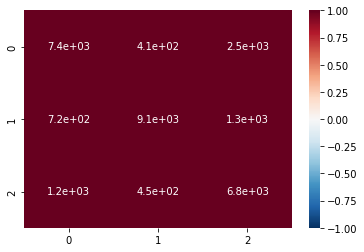

In [ ]:
#Plotting the Confusion Matrix using Seaborn Library
sns.heatmap(confusion_matrix(whole, y), annot = True,  vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r")
plt.show()

# Saving Model

In [ ]:
#Opening txt file with the name modelCovid.txt in write binary format
file = open('ModelCovid.txt', 'wb')
#Dumping model to that file
pickle.dump(model, file)
#Closing the file
file.close()